# Importing essential python Libraries 

In [807]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Loading excel datasets using openpyxl engine

In [808]:
df = pd.read_excel("data/Data_Train.xlsx", engine="openpyxl")
df.sample(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
3119,Multiple carriers,6/06/2019,Delhi,Cochin,DEL → HYD → COK,07:10,22:30,15h 20m,1 stop,No info,7038
2465,IndiGo,3/05/2019,Mumbai,Hyderabad,BOM → HYD,09:10,10:40,1h 30m,non-stop,No info,5755
8668,Jet Airways,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:25,18:00 07 Jun,21h 35m,1 stop,No info,12692
205,Jet Airways,18/04/2019,Banglore,Delhi,BLR → DEL,15:15,18:10,2h 55m,non-stop,No info,7229
2830,IndiGo,21/03/2019,Delhi,Cochin,DEL → BOM → COK,16:00,21:00,5h,1 stop,No info,6232


# Data Inspection and Profiling

In [809]:
df.shape # shape of the DataFrame (row, columns)

(10683, 11)

* Here we can see total number of rows is 10683 and columns is 11.

In [810]:
df.isnull().any() # checks if the DataFrame columns contains the null value of not

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route               True
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops         True
Additional_Info    False
Price              False
dtype: bool

* Here Route and Total_Stops columns consists of null value"

In [811]:
df.isna().sum() # gives total number of missing values(null) in the columns

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

* Route and Total_Stops columns contains of 1 missing values each

In [812]:
df.isna().sum() / len(df) # gives percentage of the missing values of the columns

Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Route              0.000094
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Total_Stops        0.000094
Additional_Info    0.000000
Price              0.000000
dtype: float64

In [813]:
df.dropna(inplace=True) # since only 2 rows contains missing values so deleting the rows which contains the missing values
df.reset_index(inplace=True, drop=True) # resetting index of the dataframe as index from the middle is dropped

In [814]:
df.isnull().any() # after deleting checking the missing value if there is any

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route              False
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops        False
Additional_Info    False
Price              False
dtype: bool

In [815]:
df.dtypes # checking the datatypes of all the columns

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [816]:
df.info() # checking the info of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


* Using DataFrame.info() we can see that total number of columns is 11, and rows is 10692.
* we can see all th columns name and number of null value and not-null value.
* DataFrame consists of 1 int64 dtypes and 10 object dtypes.
* And memory usage by the DataFrame is 918.1+ KB.

In [817]:
df.describe() # overview of the numerical data

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


* In above table we can see total no. of counts which is 10682, mean value of Price is 9087.214567, standard deviation is 4611.548810.
* Minimum value of Price is 1759 whereas maximum value is 79512 as well as we can see first quartile, median and third quartile.

In [818]:
df.describe(include="object") # overview of the categorical data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10682,10682,10682,10682,10682,10682,10682,10682,10682,10682
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4536,4536,2376,233,423,550,5625,8344


* Above we can see overview of categorical data.
* In the Airlie column total count is 10682, unique values are 12, top values are Jet Airways which frequency is 3849.
* In the Source column total count is 10682, unique values are 5, top values count are of Delhi  which frequency is 4536 and so on.

In [819]:
df.sample(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
1779,IndiGo,21/03/2019,Delhi,Cochin,DEL → HYD → COK,07:35,22:20,14h 45m,1 stop,No info,6558
4302,IndiGo,12/06/2019,Kolkata,Banglore,CCU → BLR,11:30,14:05,2h 35m,non-stop,No info,4804


In [820]:
day = []
month = []
for date in df["Date_of_Journey"]: # looping through date_of_journey to get day and month
    list_date = date.split("/") # splitting the date using "/" to get the form of ["9", "05", "2019"]
    day.append(list_date[0]) # appending 0 index data to day 
    month.append(list_date[1]) # appending 1 index data to month list

# month

In [821]:
df["Day"] = day # inserting day columns 
df["Month"] = month # inserting month columns in the dataframe

In [822]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03


In [823]:
df.drop("Date_of_Journey", axis=1, inplace=True) # deleting Date of journey columns form the dataframe

In [824]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05


In [825]:
# Extracting hour and minute from the Departure time (Dep_Time) from the dataframe and dumping it in new columns (Dep_Hour, Dep_Minute)
dep_hrs = []
dep_min = []
for time in df["Dep_Time"]:
    # print(time)
    list_time = time.split(":")
    # print(list_time)
    dep_hrs.append(list_time[0])
    dep_min.append(list_time[1])
# dep_hrs
# dep_min

In [826]:
# Adding columns Dep_Hours and Dep_Minute in the DataFrame
df["Dep_Hours"] = dep_hrs
df["Dep_Minutes"] = dep_min

In [827]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_Hours,Dep_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,05,50


In [828]:
# Deleting Dep_Time columns from the dataframe
df.drop("Dep_Time", axis="columns", inplace=True)
df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_Hours,Dep_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,05,05,50


In [829]:
df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
Day                object
Month              object
Dep_Hours          object
Dep_Minutes        object
dtype: object

In [830]:
# Extracting hour and minute from the Arrival time (Arrival_Time) from the dataframe and dumping it in new columns (Arrival_Hour, Arrival_Minute)
df["Arrival_Hour"] = pd.DatetimeIndex(df["Arrival_Time"]).hour
df["Arrival_Minute"] = pd.DatetimeIndex(df["Arrival_Time"]).minute
df.drop("Arrival_Time", axis=1, inplace=True)

In [831]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_Hours,Dep_Minutes,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,03,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,05,05,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,06,09,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,05,18,05,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,01,03,16,50,21,35


In [832]:
# converting Duration in the format with out alphabets 
td = pd.to_timedelta(df["Duration"])
td

0       0 days 02:50:00
1       0 days 07:25:00
2       0 days 19:00:00
3       0 days 05:25:00
4       0 days 04:45:00
              ...      
10677   0 days 02:30:00
10678   0 days 02:35:00
10679   0 days 03:00:00
10680   0 days 02:40:00
10681   0 days 08:20:00
Name: Duration, Length: 10682, dtype: timedelta64[ns]

In [833]:
# extracting duration hour and duration minute from the time delta(td)
dur_hr = []
dur_min = []
for i in range(len(td)): # loop using the length of timedelta
    seconds = td[i].seconds  # taking out the time in the format of seconds 
    minutes = seconds / 60  # total minutes in the duration
    hour = minutes // 60 #  # converting minutes in hours with the help of floor division
    minute = minutes % 60 # # minutes
    dur_hr.append(hour)  # appending the hour in duration hour list
    dur_min.append(minute) # appending the minute in duration minute list

dur_min[:5]

[50.0, 25.0, 0.0, 25.0, 45.0]

In [834]:
# Adding new column in the dataframe Duration_Hour and Duration_Minute
df["Duration_Hour"] = dur_hr
df["Duration_Minute"] = dur_min

In [835]:
# converting datatype of the columns in the int format using astype method
df[["Day", "Month", "Dep_Hours", "Dep_Minutes", "Duration_Hour", "Duration_Minute"]] = df[["Day", "Month", "Dep_Hours", "Dep_Minutes", "Duration_Hour", "Duration_Minute"]].astype("int32")

In [836]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_Hours,Dep_Minutes,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25


In [837]:
df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
Day                 int32
Month               int32
Dep_Hours           int32
Dep_Minutes         int32
Arrival_Hour        int32
Arrival_Minute      int32
Duration_Hour       int32
Duration_Minute     int32
dtype: object

In [838]:
# dropping Duration columns from the dataframe as hour and minute are already extracted from the duration
df.drop("Duration", axis=1, inplace=True)

In [839]:
df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,Dep_Hours,Dep_Minutes,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25


In [840]:
# extracting each route in a separate columns
l_route = [] # length of the route
routes = [] # total no. of the rutes in list of list

for i in range(len(df["Route"])): # looping through the length of the Route columns
    
    routes_n = [] # assigning empty value so that in the next iteration it should be empty
    item = df["Route"][i] # n item from the route column
    list = item.split("→") # splitting the item in the form of list
    # print(list)
    l_route.append(len(list)) #appending length of the list in the l_route list to get the length of the list

    for j in range(6): # looping 6 times to get 6 route (route_1 to route_6)
        
        if j < len(list): # if the value of j is less than length of list it will append the value in the list in the routes_n list
            routes_n.append(1) 
                    
        else:
            routes_n.append(0) # else if there is not value it will append "Nan"
            
    routes.append(routes_n) # appending routes into routes list to form list of list
                    
            
# routes
# l_route

In [841]:
# Adding new columns length of the route and all the route from route 1 to route 6 to the columns
df[["Route_1", "Route_2", "Route_3", "Route_4", "Route_5", "Route_6"]] = routes

In [842]:
# adding length_of_Route columns to the DataFrame
df["Length_of_Route"] = l_route

In [843]:
# dropping the route column after extracting each data
df.drop("Route", axis=1, inplace=True)

In [844]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Dep_Hours,Dep_Minutes,...,Arrival_Minute,Duration_Hour,Duration_Minute,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6,Length_of_Route
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,22,20,...,10,2,50,1,1,0,0,0,0,2
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,5,50,...,15,7,25,1,1,1,1,0,0,4


In [845]:
# REplacing categorical data of Total_stops with numerical value
df.replace(["non-stop", "1 stop", "2 stops", "3 stops", "4 stops"], [0, 1, 2, 3 ,4], inplace=True)
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Dep_Hours,Dep_Minutes,...,Arrival_Minute,Duration_Hour,Duration_Minute,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6,Length_of_Route
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,22,20,...,10,2,50,1,1,0,0,0,0,2
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,5,50,...,15,7,25,1,1,1,1,0,0,4
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,9,25,...,25,19,0,1,1,1,1,0,0,4
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,18,5,...,30,5,25,1,1,1,0,0,0,3
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,16,50,...,35,4,45,1,1,1,0,0,0,3


### Since source, Destination, Airline and Additional_Info are nominal Data we use One Hot Encoding()

In [846]:
# performing one hot encoding in source and destinatio column
df = pd.get_dummies(data=df, columns=["Airline", "Source", "Destination", "Additional_Info"], drop_first=False, dtype="int")

In [847]:
df.head(2)

,Total_Stops,Price,Day,Month,Dep_Hours,Dep_Minutes,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,1,0
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,0,0,0,0,0,1,0


In [848]:
# Working with Total stops columns in the dataframe
# df["Total_Stops"].unique()
df.columns

Index(['Total_Stops', 'Price', 'Day', 'Month', 'Dep_Hours', 'Dep_Minutes',
       'Arrival_Hour', 'Arrival_Minute', 'Duration_Hour', 'Duration_Minute',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5', 'Route_6',
       'Length_of_Route', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Additional_Info_1 Long layover',
       'Additional_Info_1 Short layover', 'Additional_Info_2 Long layover',
       'Additional_Info_Business class', 'Additional_Info_

In [849]:
df.isna().sum() / len(df)

Total_Stops                                     0.0
Price                                           0.0
Day                                             0.0
Month                                           0.0
Dep_Hours                                       0.0
Dep_Minutes                                     0.0
Arrival_Hour                                    0.0
Arrival_Minute                                  0.0
Duration_Hour                                   0.0
Duration_Minute                                 0.0
Route_1                                         0.0
Route_2                                         0.0
Route_3                                         0.0
Route_4                                         0.0
Route_5                                         0.0
Route_6                                         0.0
Length_of_Route                                 0.0
Airline_Air Asia                                0.0
Airline_Air India                               0.0
Airline_GoAi

In [850]:
# mapping Total stops value with numerical values
# stop_mapping = {"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}
# df["Total_Stops"] = df["Total_Stops"].str.strip().map(stop_mapping)
# df.head(2)

In [851]:
# Checking total missing values
df.dtypes

Total_Stops                                     int64
Price                                           int64
Day                                             int32
Month                                           int32
Dep_Hours                                       int32
Dep_Minutes                                     int32
Arrival_Hour                                    int32
Arrival_Minute                                  int32
Duration_Hour                                   int32
Duration_Minute                                 int32
Route_1                                         int64
Route_2                                         int64
Route_3                                         int64
Route_4                                         int64
Route_5                                         int64
Route_6                                         int64
Length_of_Route                                 int64
Airline_Air Asia                                int32
Airline_Air India           

In [852]:
df.shape

(10682, 50)

In [853]:
df_X = df[["Day", "Duration_Hour", "Length_of_Route", "Price", "Total_Stops", "Duration_Minute", "Route_3"]]
df_X

,Day,Duration_Hour,Length_of_Route,Price,Total_Stops,Duration_Minute,Route_3
0,24,2,2,3897,0,50,0
1,1,7,4,7662,2,25,1
2,9,19,4,13882,2,0,1
3,12,5,3,6218,1,25,1
4,1,4,3,13302,1,45,1
...,...,...,...,...,...,...,...
10677,9,2,2,4107,0,30,0
10678,27,2,2,4145,0,35,0
10679,27,3,2,7229,0,0,0
10680,1,2,2,12648,0,40,0


# EDA (Exploratory Data Analysis)

In [854]:
df_X.corr()

,Day,Duration_Hour,Length_of_Route,Price,Total_Stops,Duration_Minute,Route_3
Day,1.000000,-0.013416,-0.009451,-0.153774,-0.009451,-0.008940,-0.025229
Duration_Hour,-0.013416,1.000000,0.594057,0.452643,0.594057,-0.149376,0.626549
Length_of_Route,-0.009451,0.594057,1.000000,0.603897,1.000000,-0.136706,0.850506
Price,-0.153774,0.452643,0.603897,1.000000,0.603897,-0.124855,0.613801
Total_Stops,-0.009451,0.594057,1.000000,0.603897,1.000000,-0.136706,0.850506
Duration_Minute,-0.008940,-0.149376,-0.136706,-0.124855,-0.136706,1.000000,-0.179701
Route_3,-0.025229,0.626549,0.850506,0.613801,0.850506,-0.179701,1.000000


<Axes: >

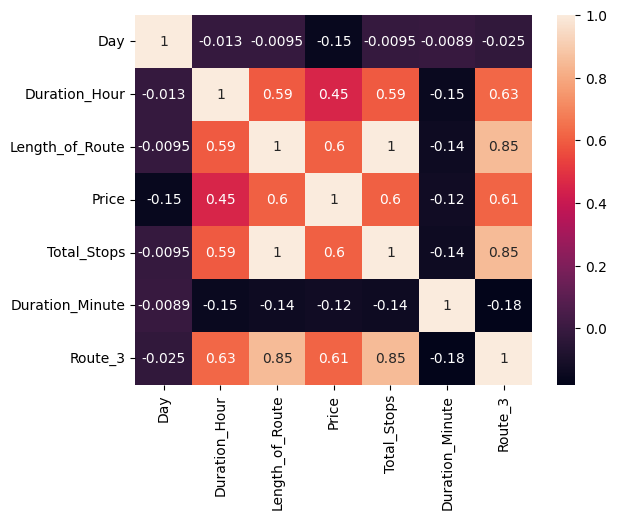

In [855]:
sns.heatmap(df_X.corr(), annot=True)

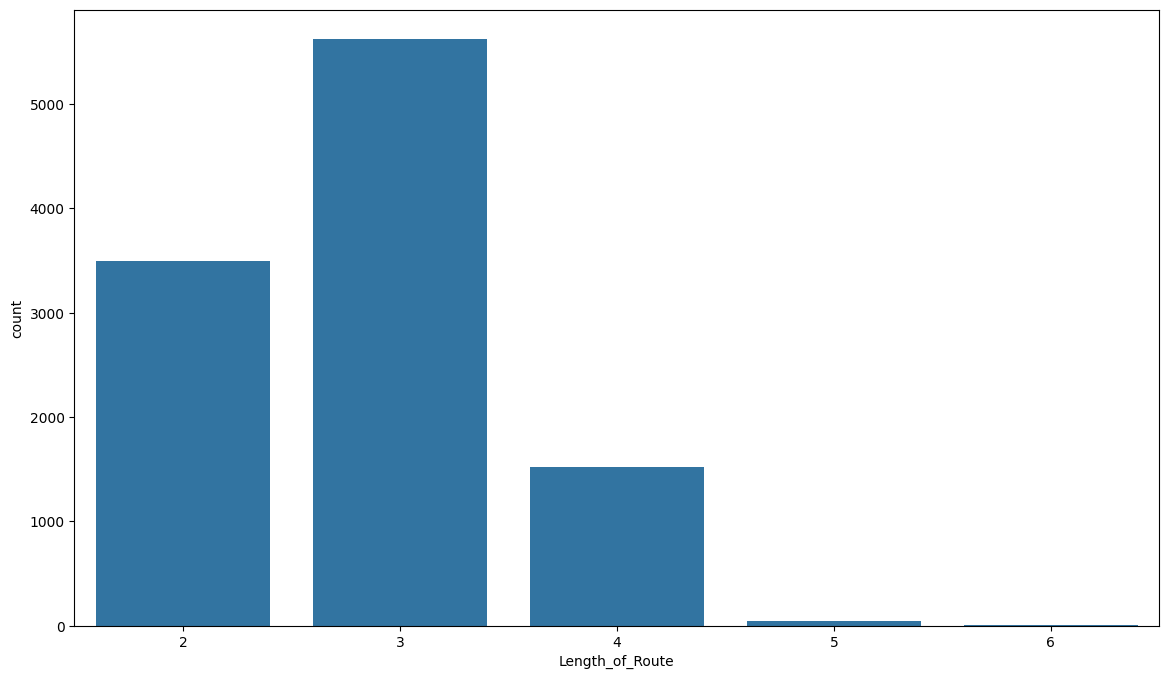

In [856]:
plt.figure(figsize=(14, 8))
sns.countplot(x="Length_of_Route", data=df)
plt.show()

In [857]:
df.groupby(["Total_Stops"], as_index=False).Price.mean()

,Total_Stops,Price
0,0,5024.900315
1,1,10594.123556
2,2,12715.807895
3,3,13112.000000
4,4,17686.000000


<Axes: xlabel='Total_Stops', ylabel='count'>

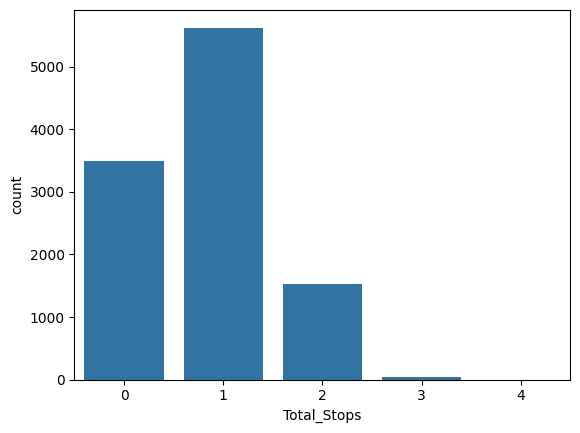

In [858]:
sns.countplot(x=df["Total_Stops"])

In [859]:
df.corr(numeric_only=True)

,Total_Stops,Price,Day,Month,Dep_Hours,Dep_Minutes,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
Total_Stops,1.000000,0.603897,-0.009451,0.054383,-0.061476,-0.002618,0.038140,-0.106940,0.594057,-0.136706,...,0.010991,0.016850,0.016850,0.005040,0.044594,0.105734,0.004364,-0.201498,-0.021140,-0.011811
Price,0.603897,1.000000,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155,0.452643,-0.124855,...,0.119207,0.037047,0.036495,0.200307,0.042834,0.039810,-0.003789,-0.207391,0.022247,0.003747
Day,-0.009451,-0.153774,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510,-0.013416,-0.008940,...,-0.056249,-0.014275,-0.014275,-0.028554,-0.037779,0.036156,-0.024727,0.033426,-0.036362,-0.014275
Month,0.054383,-0.103643,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626,0.046494,-0.040897,...,-0.056218,-0.014199,-0.014199,-0.028401,-0.037576,0.075616,-0.024595,0.013799,-0.065403,-0.014199
Dep_Hours,-0.061476,0.006799,0.002170,0.039127,1.000000,-0.024745,0.005180,0.067911,0.011526,-0.023707,...,0.003351,-0.007559,-0.010926,-0.021854,-0.011733,0.057594,-0.000460,-0.010234,-0.048484,0.017689
Dep_Minutes,-0.002618,-0.024458,-0.008170,-0.059267,-0.024745,1.000000,0.043122,-0.017597,-0.025085,0.092485,...,0.029149,0.013194,0.010616,0.022525,0.012502,-0.001658,0.003505,0.062008,-0.029510,0.000305
Arrival_Hour,0.038140,0.024244,-0.003245,-0.003927,0.005180,0.043122,1.000000,-0.154363,-0.012782,-0.118309,...,-0.000529,0.013614,-0.006135,-0.003102,0.021630,-0.016821,0.008921,-0.087730,0.050682,-0.016010
Arrival_Minute,-0.106940,-0.086155,-0.017510,-0.100626,0.067911,-0.017597,-0.154363,1.000000,-0.128140,0.151628,...,0.009540,0.000181,0.000181,-0.001103,0.001588,-0.045619,0.003699,-0.002695,0.043024,-0.008612
Duration_Hour,0.594057,0.452643,-0.013416,0.046494,0.011526,-0.025085,-0.012782,-0.128140,1.000000,-0.149376,...,0.038820,0.009454,-0.008635,-0.007473,0.004503,0.175810,-0.009736,-0.158716,-0.103162,-0.008635
Duration_Minute,-0.136706,-0.124855,-0.008940,-0.040897,-0.023707,0.092485,-0.118309,0.151628,-0.149376,1.000000,...,-0.006320,0.003811,0.006666,0.010478,-0.015822,-0.052347,0.011546,0.034531,0.035176,0.009521


In [860]:
# plt.figure(figsize=(12, 8))
# sns.heatmap(df.corr(numeric_only=True), annot=True)
# plt.show()

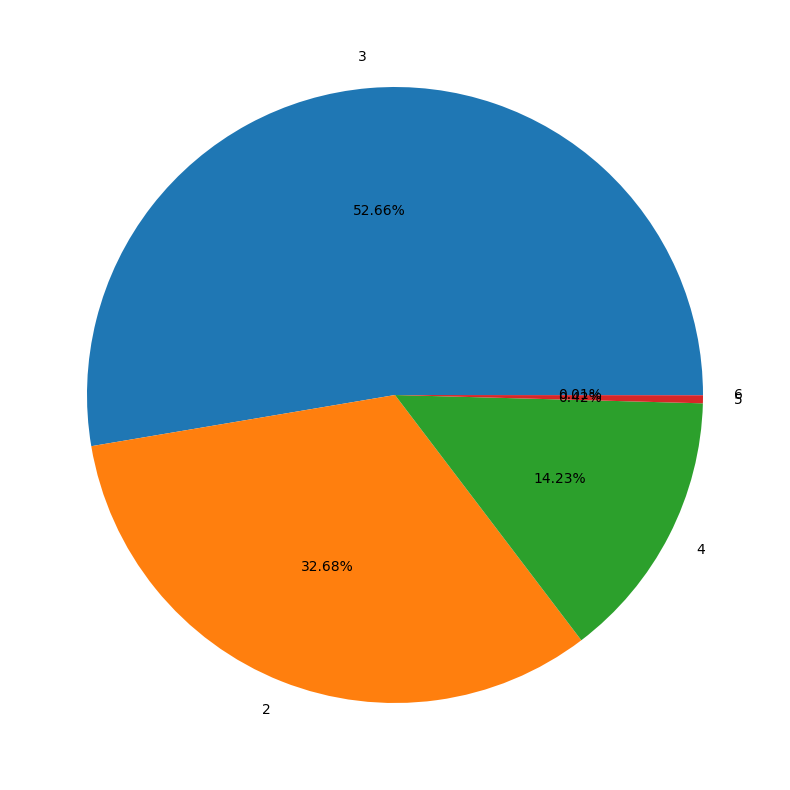

In [861]:
s = df.Length_of_Route.value_counts()
plt.figure(figsize=(14, 10))
plt.pie(s.values, labels=s.index, autopct="%.2f%%")
plt.show()

<Axes: xlabel='Duration_Hour', ylabel='count'>

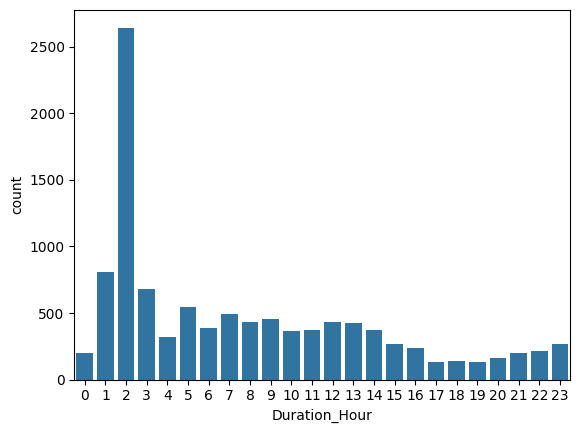

In [862]:
sns.countplot(x="Duration_Hour", data=df)

<Axes: xlabel='Dep_Hours', ylabel='Count'>

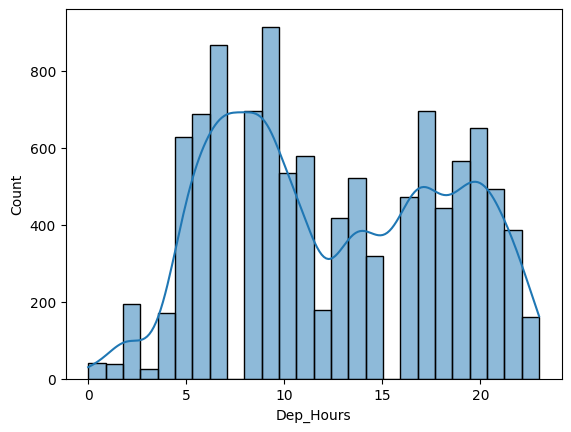

In [863]:
sns.histplot(df["Dep_Hours"], kde=True)

<Axes: xlabel='Dep_Minutes', ylabel='Count'>

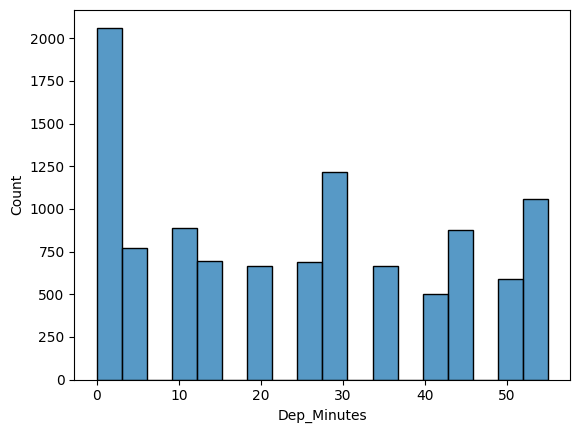

In [864]:
sns.histplot(df["Dep_Minutes"])

<Axes: ylabel='Total_Stops'>

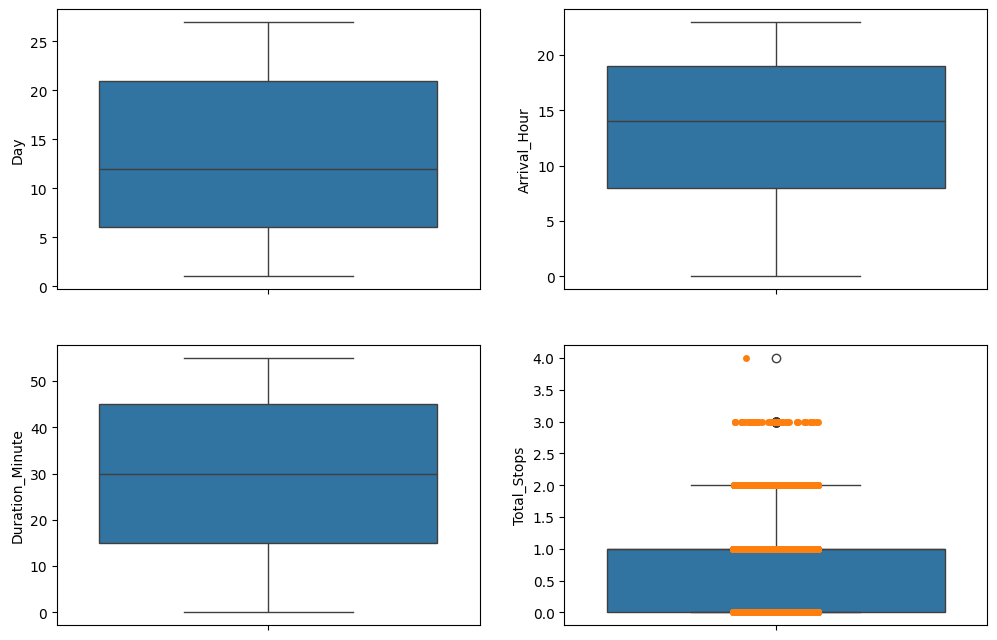

In [865]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.boxplot(df["Day"])

plt.subplot(2, 2, 2)
sns.boxplot(df["Arrival_Hour"])

plt.subplot(2, 2, 3)
sns.boxplot(df["Duration_Minute"])

plt.subplot(2, 2, 4)
sns.boxplot(df["Total_Stops"])
sns.stripplot(df["Total_Stops"])

In [866]:
df.head(2)

,Total_Stops,Price,Day,Month,Dep_Hours,Dep_Minutes,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,1,0
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,0,0,0,0,0,1,0


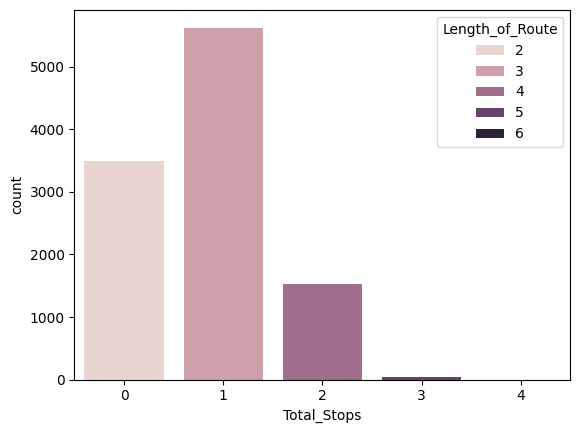

In [867]:
# Is there any relation between 
sns.countplot(x="Total_Stops", hue="Length_of_Route", data=df)
plt.show()

<Axes: ylabel='Length_of_Route'>

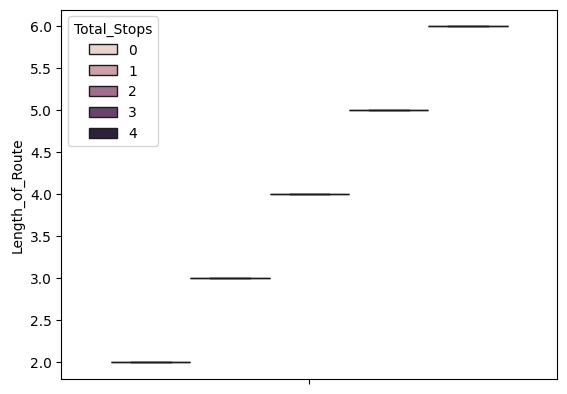

In [868]:
sns.boxplot(y="Length_of_Route", hue="Total_Stops", data=df)

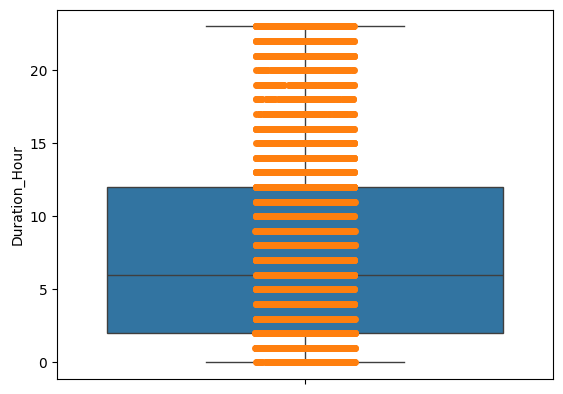

In [869]:
sns.boxplot(df["Duration_Hour"])
sns.stripplot(df["Duration_Hour"])
plt.show()

# Train Test Split

# Scaling the Data

In [870]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [871]:
# Feature selection
y = df["Price"]
df.drop("Price", axis=1, inplace=True)

dataset = sc.fit_transform(df)

X = pd.DataFrame(dataset, columns=df.columns)
X


,Total_Stops,Day,Month,Dep_Hours,Dep_Minutes,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute,Route_1,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,-1.220666,1.237288,-1.467402,1.654154,-0.234950,-1.800436,-0.890014,-0.892455,1.279041,0.0,...,-0.042212,-0.009676,-0.009676,-0.019355,-0.025607,-0.477301,-0.016761,-0.175733,0.52934,-0.009676
1,1.741432,-1.475307,0.250289,-1.303113,1.363607,-0.050909,-0.587094,-0.113497,-0.196319,0.0,...,-0.042212,-0.009676,-0.009676,-0.019355,-0.025607,-0.477301,-0.016761,-0.175733,0.52934,-0.009676
2,1.741432,-0.531796,1.109135,-0.607286,0.031476,-1.363054,0.018745,1.756004,-1.671678,0.0,...,-0.042212,-0.009676,-0.009676,-0.019355,-0.025607,-0.477301,-0.016761,-0.175733,0.52934,-0.009676
3,0.260383,-0.177979,0.250289,0.958326,-1.034229,1.407030,0.321664,-0.425080,-0.196319,0.0,...,-0.042212,-0.009676,-0.009676,-0.019355,-0.025607,-0.477301,-0.016761,-0.175733,0.52934,-0.009676
4,0.260383,-1.475307,-1.467402,0.610412,1.363607,1.115442,0.624584,-0.580872,0.983969,0.0,...,-0.042212,-0.009676,-0.009676,-0.019355,-0.025607,-0.477301,-0.016761,-0.175733,0.52934,-0.009676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,-1.220666,-0.531796,-0.608557,1.132283,1.630034,1.261236,0.018745,-0.892455,0.098753,0.0,...,-0.042212,-0.009676,-0.009676,-0.019355,-0.025607,-0.477301,-0.016761,-0.175733,0.52934,-0.009676
10678,-1.220666,1.591104,-0.608557,1.306240,1.097181,1.407030,-0.284175,-0.892455,0.393825,0.0,...,-0.042212,-0.009676,-0.009676,-0.019355,-0.025607,-0.477301,-0.016761,-0.175733,0.52934,-0.009676
10679,-1.220666,1.591104,-0.608557,-0.781243,-0.234950,-0.342497,-0.284175,-0.736663,-1.671678,0.0,...,-0.042212,-0.009676,-0.009676,-0.019355,-0.025607,-0.477301,-0.016761,-0.175733,0.52934,-0.009676
10680,-1.220666,-1.475307,-1.467402,-0.259372,0.297903,0.094885,-0.890014,-0.892455,0.688897,0.0,...,-0.042212,-0.009676,-0.009676,-0.019355,-0.025607,-0.477301,-0.016761,-0.175733,0.52934,-0.009676


In [872]:
# splitting the DataFrame in the train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# X_train
# X_test
# y_train
# y_test

In [873]:
X_train_data = X_train[["Length_of_Route", "Route_3", "Duration_Hour"]].values
X_test_data = X_test[["Length_of_Route", "Route_3", "Duration_Hour"]].values

# Model Linear Regression

In [874]:
model = LinearRegression()
model.fit(X_train_data, y_train)

LinearRegression()

In [875]:
# coef_
m = model.coef_
m

array([1262.85026436, 1481.45289949,  405.76610132])

In [876]:
# intercept_
c = model.intercept_
c

9054.435717779852

In [877]:
# y_predicted value
y_pred = model.predict(X_test_data)
y_pred[:5], len(y_pred)

(array([10432.63237629, 10242.98739413,  5024.57225209, 10179.77240007,
         5024.57225209]),
 2137)

In [878]:
price = c + m[0] * df["Length_of_Route"] + m[1] * df["Duration_Hour"] + m[2] * df["Route_3"]
price

0        14543.042045
1        24881.773173
2        42659.207967
3        20656.017110
4        19174.564210
             ...     
10677    14543.042045
10678    14543.042045
10679    16024.494945
10680    14543.042045
10681    26363.226072
Length: 10682, dtype: float64

In [879]:
df.head(2)

,Total_Stops,Day,Month,Dep_Hours,Dep_Minutes,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute,Route_1,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,24,3,22,20,1,10,2,50,1,...,0,0,0,0,0,0,0,0,1,0
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,0,0,0,0,0,1,0


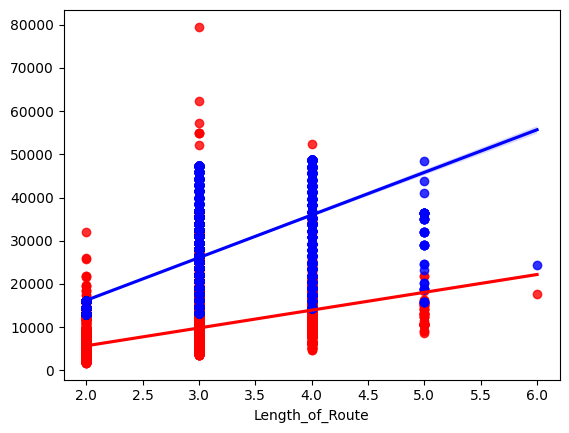

In [880]:
sns.regplot(x="Length_of_Route", y=y, data=df, color="Red")
sns.regplot(x="Length_of_Route", y=price, data=df, color="Blue")
plt.show()

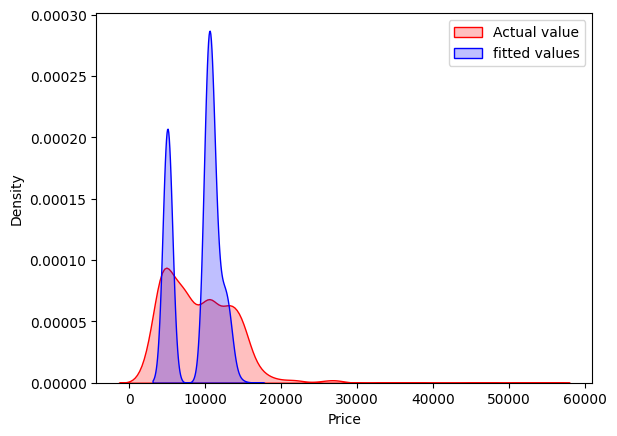

In [881]:
sns.kdeplot(y_test, color="r", label="Actual value", fill=True)
sns.kdeplot(y_pred, color="b", label="fitted values", fill=True)

plt.legend()
plt.show()

In [882]:
# Mean absolute error
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
mse

14279655.975891832

In [883]:
# Mean absolute error
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
mae

2477.1889951315457

In [884]:
# r2_score
r2 = r2_score(y_true=y_test, y_pred=y_pred)
r2

0.3914013770474637

In [885]:
# X_train_data = X_train.values
# X_test_data = X_test.values
model = LinearRegression()
model.fit(X_train, y_train)
m_all = model.coef_
c_all = model.intercept_
y_pred = model.predict(X_test)
# price = c + m[0] * df["Day"] + m[1] * df["Length_of_Route"]
mse_all = mean_squared_error(y_true=y_test, y_pred=y_pred)
mae_all = mean_absolute_error(y_true=y_test, y_pred=y_pred)
r2_all = r2_score(y_true=y_test, y_pred=y_pred)

In [886]:
mse_all, mae_all, r2_all, m_all, c_all

(5.6288988934489914e+32,
 513226961093524.75,
 -2.3990354677141705e+25,
 array([ 5.17371390e+14, -5.49687500e+02, -4.77785392e+02,  9.61379124e+01,
        -5.51407359e+01, -1.10678411e+02,  4.12277358e+01,  6.45581605e+01,
         3.61876146e+01, -4.41392838e+15,  3.04969441e+14,  2.14088025e+15,
         1.61443604e+15,  2.98875893e+14,  1.06554301e+16, -3.59918210e+15,
        -6.98294704e+15, -1.51877617e+16, -5.47832587e+15, -1.61649873e+16,
        -1.96961038e+16, -9.72032007e+14, -1.29362324e+16, -1.43032323e+15,
        -1.09094747e+16, -3.96923320e+14, -8.49048224e+15, -6.87426988e+14,
        -4.19866820e+16, -1.54461443e+16, -5.29435221e+16, -5.03620430e+16,
        -1.60180232e+16, -3.05700839e+16, -3.72933099e+16, -2.54226150e+16,
        -2.90679514e+16, -1.84112257e+16, -2.22038834e+16,  6.24650613e+14,
         1.43425583e+14,  1.43425583e+14,  2.86810878e+14,  3.79361826e+14,
         5.76278101e+15,  2.48397137e+14,  2.52707103e+15,  6.12957081e+15,
         1.43425

In [887]:
y_pred

array([13191.921875,  7087.921875,  2827.921875, ..., 11003.921875,
        9924.640625,  4163.140625])

In [888]:
X_train_data = X_train[["Duration_Hour"]].values
X_test_data = X_test[["Duration_Hour"]].values
model = LinearRegression()
model.fit(X_train_data, y_train)
m = model.coef_
c = model.intercept_
y_pred = model.predict(X_test_data)
price = c + m[0] * df["Duration_Hour"]
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
r2 = r2_score(y_true=y_test, y_pred=y_pred)

In [889]:
mse, mae, r2

(18987018.30485045, 3128.4556943992457, 0.1907736983429048)

In [890]:
price

0        13230.648720
1        23659.130647
2        48687.487272
3        19487.737876
4        17402.041491
             ...     
10677    13230.648720
10678    13230.648720
10679    15316.345105
10680    13230.648720
10681    25744.827032
Name: Duration_Hour, Length: 10682, dtype: float64

In [891]:
X_train_data = X_train[["Total_Stops"]].values
X_test_data = X_test[["Total_Stops"]].values
model = LinearRegression()
model.fit(X_train_data, y_train)
m = model.coef_
c = model.intercept_
y_pred = model.predict(X_test_data)
price = c + m[0] * df["Total_Stops"]
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
r2 = r2_score(y_true=y_test, y_pred=y_pred)

In [892]:
mse, mae, r2, m, c

(15172167.651184391,
 2649.876198786193,
 0.3533625491184744,
 array([2769.02654965]),
 9057.073427084548)

In [893]:
price

0         9057.073427
1        14595.126526
2        14595.126526
3        11826.099977
4        11826.099977
             ...     
10677     9057.073427
10678     9057.073427
10679     9057.073427
10680     9057.073427
10681    14595.126526
Name: Total_Stops, Length: 10682, dtype: float64

<Axes: >

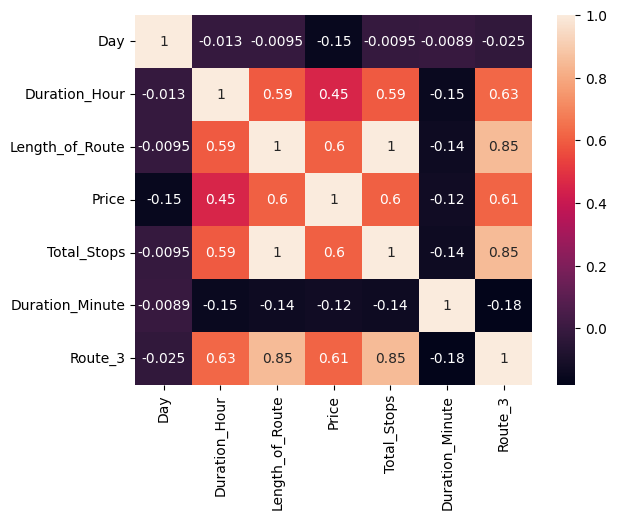

In [894]:
sns.heatmap(df_X.corr(), annot=True)

In [895]:
X_train_data = X_train[["Length_of_Route"]].values
X_test_data = X_test[["Length_of_Route"]].values
model = LinearRegression()
model.fit(X_train_data, y_train)
m = model.coef_
c = model.intercept_
y_pred = model.predict(X_test_data)
price = c + m[0] * df["Length_of_Route"]
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
mse, mae, r2

(15172167.65118439, 2649.8761987861926, 0.35336254911847453)

In [896]:
X_train_data = X_train[["Length_of_Route", "Duration_Hour", "Route_3"]].values
X_test_data = X_test[["Length_of_Route", "Duration_Hour", "Route_3"]].values
model = LinearRegression()
model.fit(X_train_data, y_train)
m = model.coef_
c = model.intercept_
y_pred = model.predict(X_test_data)
price = c + m[0] * df["Length_of_Route"] + m[1] * df["Duration_Hour"] + m[2] * df["Route_3"]
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
mse, mae, r2

(14279655.97589183, 2477.1889951315466, 0.3914013770474637)

In [897]:
price

0        12391.668449
1        18427.652384
2        23296.845600
3        16353.269917
4        15947.503816
             ...     
10677    12391.668449
10678    12391.668449
10679    12797.434550
10680    12391.668449
10681    18833.418485
Length: 10682, dtype: float64

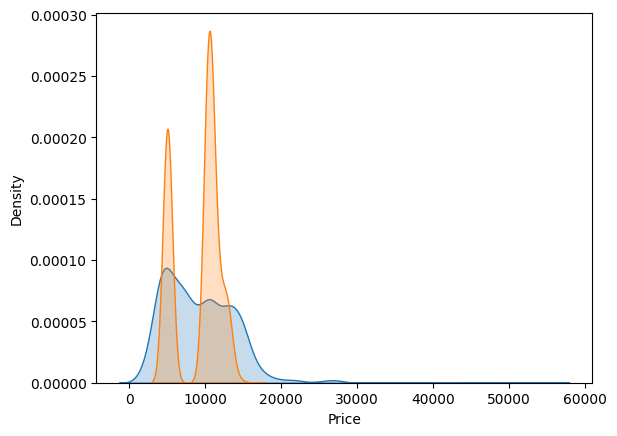

In [898]:
ax1 = sns.kdeplot(y_test, fill=True)
sns.kdeplot(y_pred, fill=True)
plt.show()

In [899]:
y_test

10506    14781
7705      5636
7700      3597
1437     16757
8884      4804
         ...  
6391      3943
9272      4804
6199      8971
10036     9663
8970      3873
Name: Price, Length: 2137, dtype: int64

In [900]:
y_pred

array([10432.63237629, 10242.98739413,  5024.57225209, ...,
       11860.47050822, 10685.49235251,  5024.57225209])

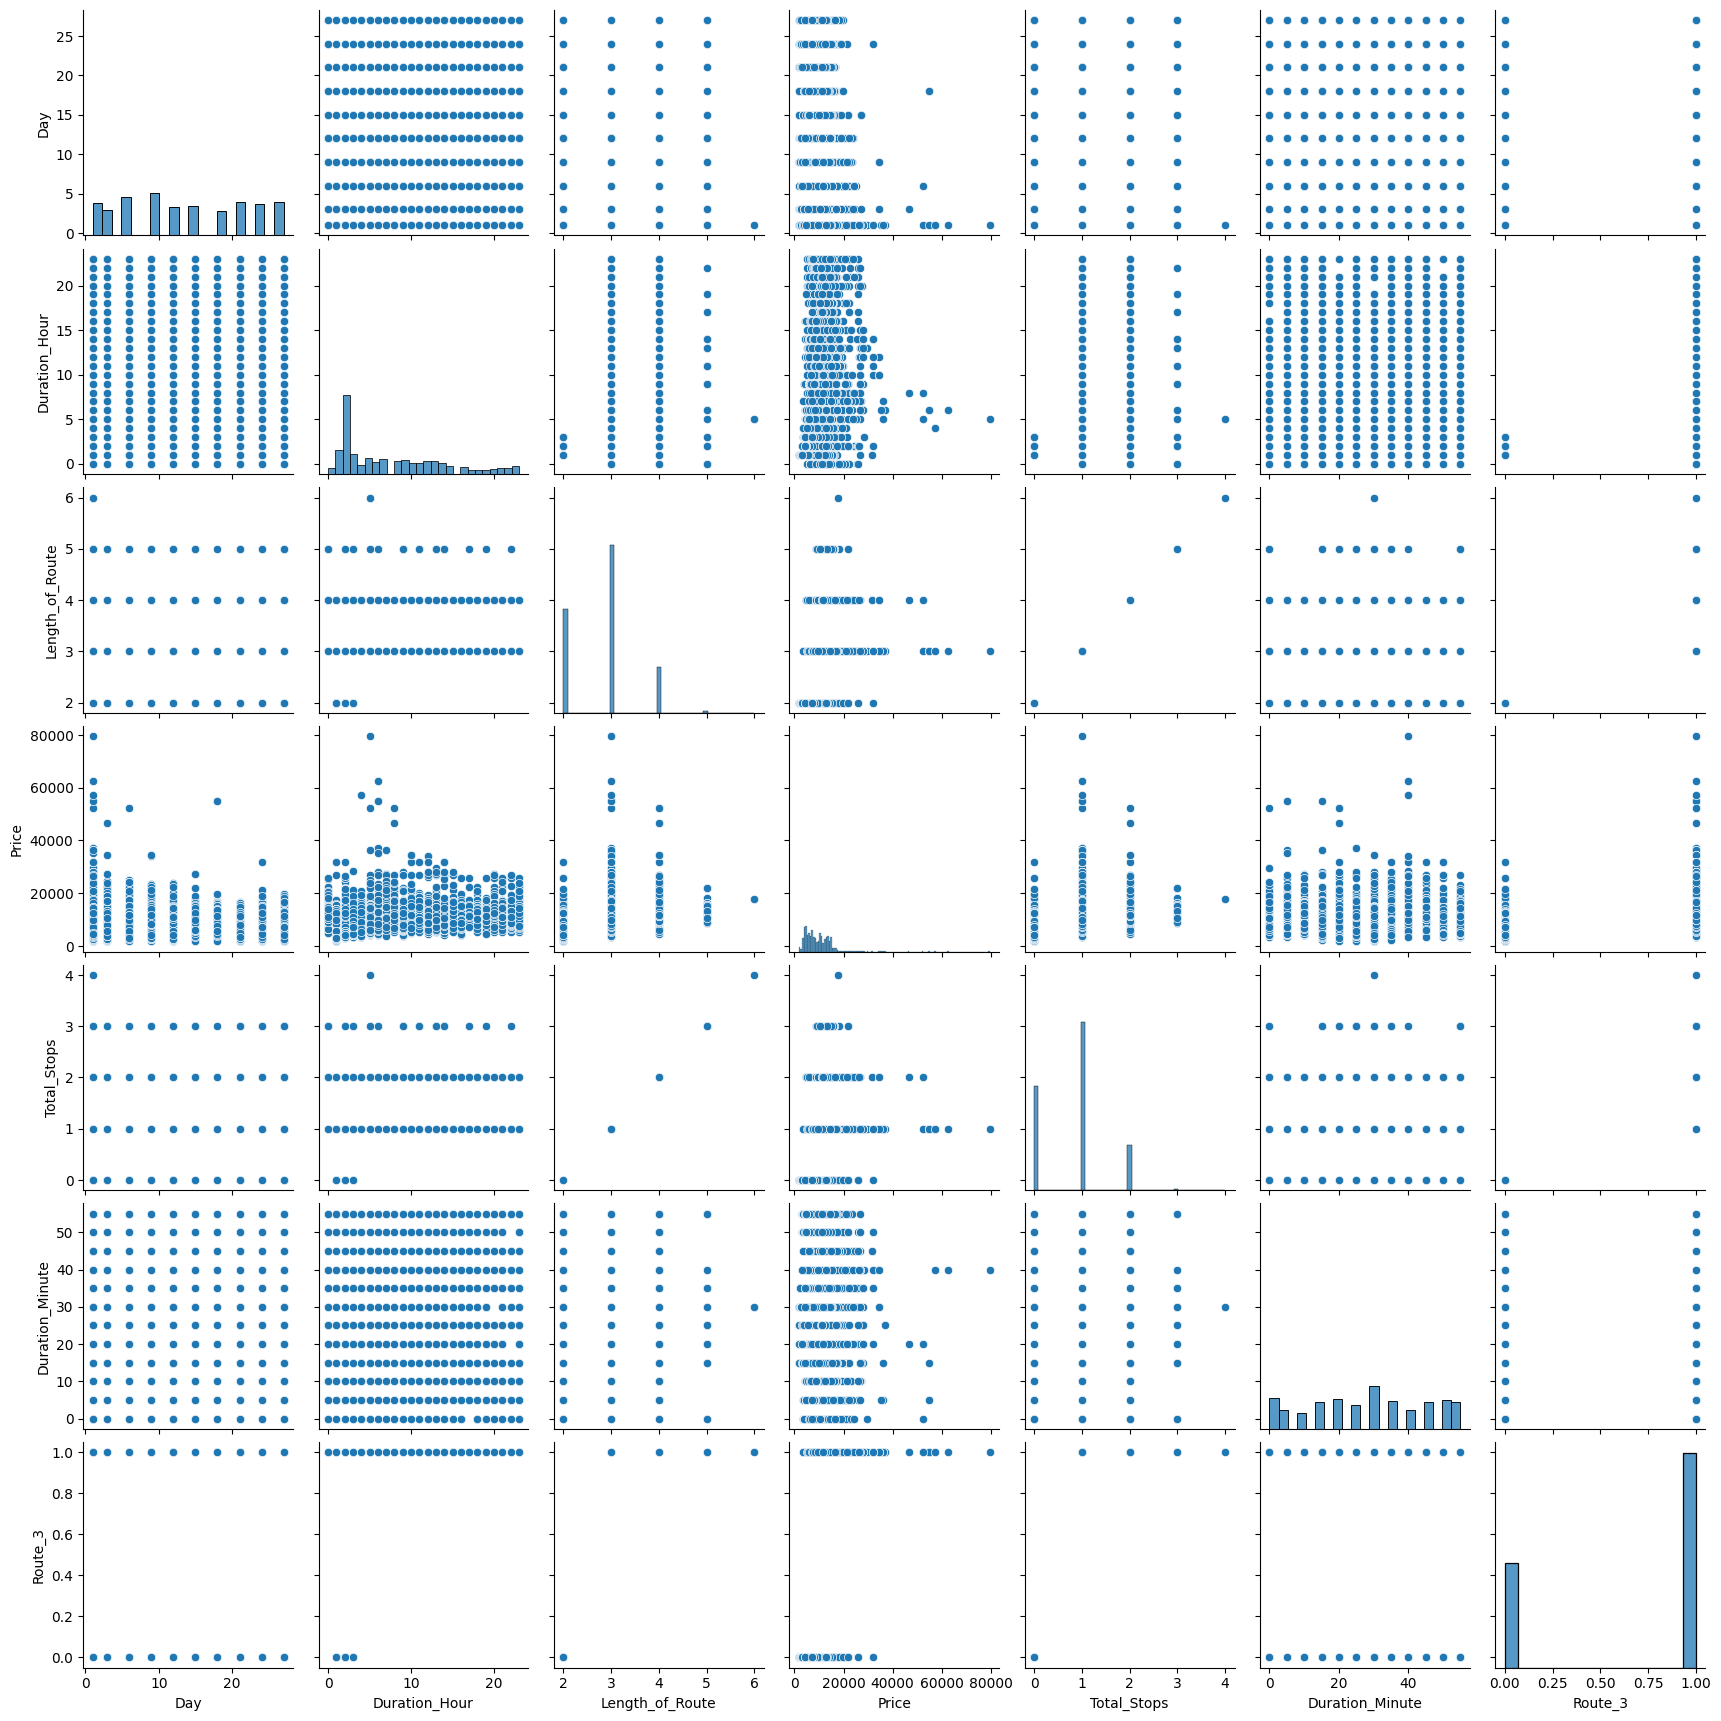

In [901]:
sns.pairplot(df_X)

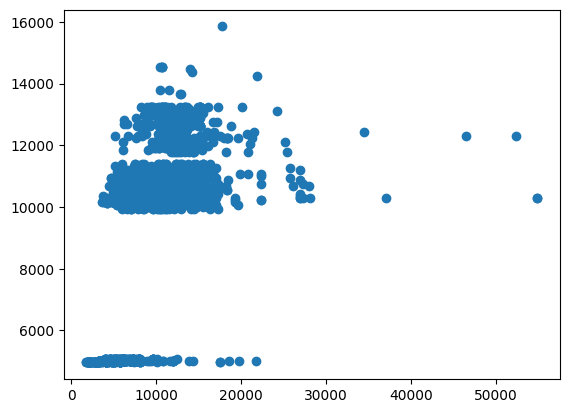

In [902]:
plt.scatter(y_test, y_pred)

In [903]:
X_train_data = X_train
X_test_data = X_test
model = LinearRegression()
model.fit(X_train_data, y_train)
m = model.coef_
c = model.intercept_
y_pred = model.predict(X_test_data)
# price = c + m[0] * df["Length_of_Route"] + m[1] * df["Duration_Hour"] + m[2] * df["Route_3"]
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
mse, mae, r2

(5.6288988934489914e+32, 513226961093524.75, -2.3990354677141705e+25)

In [904]:
y_pred

array([13191.921875,  7087.921875,  2827.921875, ..., 11003.921875,
        9924.640625,  4163.140625])

In [905]:
model.predict([X.loc[2].values])

C:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15458.640625])

In [906]:
[X.loc[2].values]

[array([ 1.74143186, -0.53179604,  1.10913453, -0.60728573,  0.0314763 ,
        -1.3630545 ,  0.0187446 ,  1.75600386, -1.67167809,  0.        ,
         0.        ,  0.6967553 ,  2.41271642, -0.06576423, -0.00967596,
         1.74143186, -0.17544968, -0.44278513, -0.13600489, -0.48776905,
         1.3323912 , -0.02370671, -0.35507822, -0.03490678, -0.28797191,
        -0.00967596, -0.21667251, -0.01676082, -0.50884921, -0.19231927,
         1.16401816, -0.60626609, -0.2642058 , -0.60626609,  1.16401816,
        -0.36651266, -0.2642058 , -0.19231927, -0.30917591, -0.04221211,
        -0.00967596, -0.00967596, -0.01935464, -0.02560738, -0.47730084,
        -0.01676082, -0.17573295,  0.52934048, -0.00967596])]

In [907]:
X_train_data = X_train[["Length_of_Route", "Route_3", "Duration_Hour"]].values
X_test_data = X_test[["Length_of_Route", "Route_3", "Duration_Hour"]].values
model = LinearRegression()
model.fit(X_train_data, y_train)
m = model.coef_
c = model.intercept_
y_pred = model.predict(X_test_data)
price = c + m[0] * df["Length_of_Route"] + m[1] * df["Route_3"] + m[2] * df["Duration_Hour"]
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
mse, mae, r2

(14279655.975891832, 2477.1889951315457, 0.3914013770474637)

In [908]:
df.Total_Stops.value_counts()

Total_Stops
1    5625
0    3491
2    1520
3      45
4       1
Name: count, dtype: int64

# Lasso

In [909]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X_train_data, y_train)

Lasso()

In [910]:
y_pred = model.predict(X_test_data)

In [911]:
r2 = r2_score(y_true=y_test, y_pred=y_pred)
r2

0.391394970486191

# Ridge

In [912]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train_data, y_train)

Ridge()

In [913]:
y_pred = model.predict(X_test_data)

In [914]:
r2 = r2_score(y_true=y_test, y_pred=y_pred)
r2

0.39139938714217093